Basis Functions
===============

### [Neil D. Lawrence](http://inverseprobability.com), University of

Cambridge

**Abstract**: In the last session we explored least squares for
univariate and multivariate *regression*. We introduced *matrices*,
*linear algebra* and *derivatives*.

In this session we will introduce *basis functions* which allow us to
implement *non-linear regression models*.

$$
\newcommand{\tk}[1]{}
\newcommand{\Amatrix}{\mathbf{A}}
\newcommand{\KL}[2]{\text{KL}\left( #1\,\|\,#2 \right)}
\newcommand{\Kaast}{\kernelMatrix_{\mathbf{ \ast}\mathbf{ \ast}}}
\newcommand{\Kastu}{\kernelMatrix_{\mathbf{ \ast} \inducingVector}}
\newcommand{\Kff}{\kernelMatrix_{\mappingFunctionVector \mappingFunctionVector}}
\newcommand{\Kfu}{\kernelMatrix_{\mappingFunctionVector \inducingVector}}
\newcommand{\Kuast}{\kernelMatrix_{\inducingVector \bf\ast}}
\newcommand{\Kuf}{\kernelMatrix_{\inducingVector \mappingFunctionVector}}
\newcommand{\Kuu}{\kernelMatrix_{\inducingVector \inducingVector}}
\newcommand{\Kuui}{\Kuu^{-1}}
\newcommand{\Qaast}{\mathbf{Q}_{\bf \ast \ast}}
\newcommand{\Qastf}{\mathbf{Q}_{\ast \mappingFunction}}
\newcommand{\Qfast}{\mathbf{Q}_{\mappingFunctionVector \bf \ast}}
\newcommand{\Qff}{\mathbf{Q}_{\mappingFunctionVector \mappingFunctionVector}}
\newcommand{\aMatrix}{\mathbf{A}}
\newcommand{\aScalar}{a}
\newcommand{\aVector}{\mathbf{a}}
\newcommand{\acceleration}{a}
\newcommand{\bMatrix}{\mathbf{B}}
\newcommand{\bScalar}{b}
\newcommand{\bVector}{\mathbf{b}}
\newcommand{\basisFunc}{\phi}
\newcommand{\basisFuncVector}{\boldsymbol{ \basisFunc}}
\newcommand{\basisFunction}{\phi}
\newcommand{\basisLocation}{\mu}
\newcommand{\basisMatrix}{\boldsymbol{ \Phi}}
\newcommand{\basisScalar}{\basisFunction}
\newcommand{\basisVector}{\boldsymbol{ \basisFunction}}
\newcommand{\activationFunction}{\phi}
\newcommand{\activationMatrix}{\boldsymbol{ \Phi}}
\newcommand{\activationScalar}{\basisFunction}
\newcommand{\activationVector}{\boldsymbol{ \basisFunction}}
\newcommand{\bigO}{\mathcal{O}}
\newcommand{\binomProb}{\pi}
\newcommand{\cMatrix}{\mathbf{C}}
\newcommand{\cbasisMatrix}{\hat{\boldsymbol{ \Phi}}}
\newcommand{\cdataMatrix}{\hat{\dataMatrix}}
\newcommand{\cdataScalar}{\hat{\dataScalar}}
\newcommand{\cdataVector}{\hat{\dataVector}}
\newcommand{\centeredKernelMatrix}{\mathbf{ \MakeUppercase{\centeredKernelScalar}}}
\newcommand{\centeredKernelScalar}{b}
\newcommand{\centeredKernelVector}{\centeredKernelScalar}
\newcommand{\centeringMatrix}{\mathbf{H}}
\newcommand{\chiSquaredDist}[2]{\chi_{#1}^{2}\left(#2\right)}
\newcommand{\chiSquaredSamp}[1]{\chi_{#1}^{2}}
\newcommand{\conditionalCovariance}{\boldsymbol{ \Sigma}}
\newcommand{\coregionalizationMatrix}{\mathbf{B}}
\newcommand{\coregionalizationScalar}{b}
\newcommand{\coregionalizationVector}{\mathbf{ \coregionalizationScalar}}
\newcommand{\covDist}[2]{\text{cov}_{#2}\left(#1\right)}
\newcommand{\covSamp}[1]{\text{cov}\left(#1\right)}
\newcommand{\covarianceScalar}{c}
\newcommand{\covarianceVector}{\mathbf{ \covarianceScalar}}
\newcommand{\covarianceMatrix}{\mathbf{C}}
\newcommand{\covarianceMatrixTwo}{\boldsymbol{ \Sigma}}
\newcommand{\croupierScalar}{s}
\newcommand{\croupierVector}{\mathbf{ \croupierScalar}}
\newcommand{\croupierMatrix}{\mathbf{ \MakeUppercase{\croupierScalar}}}
\newcommand{\dataDim}{p}
\newcommand{\dataIndex}{i}
\newcommand{\dataIndexTwo}{j}
\newcommand{\dataMatrix}{\mathbf{Y}}
\newcommand{\dataScalar}{y}
\newcommand{\dataSet}{\mathcal{D}}
\newcommand{\dataStd}{\sigma}
\newcommand{\dataVector}{\mathbf{ \dataScalar}}
\newcommand{\decayRate}{d}
\newcommand{\degreeMatrix}{\mathbf{ \MakeUppercase{\degreeScalar}}}
\newcommand{\degreeScalar}{d}
\newcommand{\degreeVector}{\mathbf{ \degreeScalar}}
\newcommand{\diag}[1]{\text{diag}\left(#1\right)}
\newcommand{\diagonalMatrix}{\mathbf{D}}
\newcommand{\diff}[2]{\frac{\text{d}#1}{\text{d}#2}}
\newcommand{\diffTwo}[2]{\frac{\text{d}^2#1}{\text{d}#2^2}}
\newcommand{\displacement}{x}
\newcommand{\displacementVector}{\textbf{\displacement}}
\newcommand{\distanceMatrix}{\mathbf{ \MakeUppercase{\distanceScalar}}}
\newcommand{\distanceScalar}{d}
\newcommand{\distanceVector}{\mathbf{ \distanceScalar}}
\newcommand{\eigenvaltwo}{\ell}
\newcommand{\eigenvaltwoMatrix}{\mathbf{L}}
\newcommand{\eigenvaltwoVector}{\mathbf{l}}
\newcommand{\eigenvalue}{\lambda}
\newcommand{\eigenvalueMatrix}{\boldsymbol{ \Lambda}}
\newcommand{\eigenvalueVector}{\boldsymbol{ \lambda}}
\newcommand{\eigenvector}{\mathbf{ \eigenvectorScalar}}
\newcommand{\eigenvectorMatrix}{\mathbf{U}}
\newcommand{\eigenvectorScalar}{u}
\newcommand{\eigenvectwo}{\mathbf{v}}
\newcommand{\eigenvectwoMatrix}{\mathbf{V}}
\newcommand{\eigenvectwoScalar}{v}
\newcommand{\entropy}[1]{\mathcal{H}\left(#1\right)}
\newcommand{\errorFunction}{E}
\newcommand{\expDist}[2]{\left<#1\right>_{#2}}
\newcommand{\expSamp}[1]{\left<#1\right>}
\newcommand{\expectation}[1]{\left\langle #1 \right\rangle }
\newcommand{\expectationDist}[2]{\left\langle #1 \right\rangle _{#2}}
\newcommand{\expectedDistanceMatrix}{\mathcal{D}}
\newcommand{\eye}{\mathbf{I}}
\newcommand{\fantasyDim}{r}
\newcommand{\fantasyMatrix}{\mathbf{ \MakeUppercase{\fantasyScalar}}}
\newcommand{\fantasyScalar}{z}
\newcommand{\fantasyVector}{\mathbf{ \fantasyScalar}}
\newcommand{\featureStd}{\varsigma}
\newcommand{\gammaCdf}[3]{\mathcal{GAMMA CDF}\left(#1|#2,#3\right)}
\newcommand{\gammaDist}[3]{\mathcal{G}\left(#1|#2,#3\right)}
\newcommand{\gammaSamp}[2]{\mathcal{G}\left(#1,#2\right)}
\newcommand{\gaussianDist}[3]{\mathcal{N}\left(#1|#2,#3\right)}
\newcommand{\gaussianSamp}[2]{\mathcal{N}\left(#1,#2\right)}
\newcommand{\given}{|}
\newcommand{\half}{\frac{1}{2}}
\newcommand{\heaviside}{H}
\newcommand{\hiddenMatrix}{\mathbf{ \MakeUppercase{\hiddenScalar}}}
\newcommand{\hiddenScalar}{h}
\newcommand{\hiddenVector}{\mathbf{ \hiddenScalar}}
\newcommand{\identityMatrix}{\eye}
\newcommand{\inducingInputScalar}{z}
\newcommand{\inducingInputVector}{\mathbf{ \inducingInputScalar}}
\newcommand{\inducingInputMatrix}{\mathbf{Z}}
\newcommand{\inducingScalar}{u}
\newcommand{\inducingVector}{\mathbf{ \inducingScalar}}
\newcommand{\inducingMatrix}{\mathbf{U}}
\newcommand{\inlineDiff}[2]{\text{d}#1/\text{d}#2}
\newcommand{\inputDim}{q}
\newcommand{\inputMatrix}{\mathbf{X}}
\newcommand{\inputScalar}{x}
\newcommand{\inputSpace}{\mathcal{X}}
\newcommand{\inputVals}{\inputVector}
\newcommand{\inputVector}{\mathbf{ \inputScalar}}
\newcommand{\iterNum}{k}
\newcommand{\kernel}{\kernelScalar}
\newcommand{\kernelMatrix}{\mathbf{K}}
\newcommand{\kernelScalar}{k}
\newcommand{\kernelVector}{\mathbf{ \kernelScalar}}
\newcommand{\kff}{\kernelScalar_{\mappingFunction \mappingFunction}}
\newcommand{\kfu}{\kernelVector_{\mappingFunction \inducingScalar}}
\newcommand{\kuf}{\kernelVector_{\inducingScalar \mappingFunction}}
\newcommand{\kuu}{\kernelVector_{\inducingScalar \inducingScalar}}
\newcommand{\lagrangeMultiplier}{\lambda}
\newcommand{\lagrangeMultiplierMatrix}{\boldsymbol{ \Lambda}}
\newcommand{\lagrangian}{L}
\newcommand{\laplacianFactor}{\mathbf{ \MakeUppercase{\laplacianFactorScalar}}}
\newcommand{\laplacianFactorScalar}{m}
\newcommand{\laplacianFactorVector}{\mathbf{ \laplacianFactorScalar}}
\newcommand{\laplacianMatrix}{\mathbf{L}}
\newcommand{\laplacianScalar}{\ell}
\newcommand{\laplacianVector}{\mathbf{ \ell}}
\newcommand{\latentDim}{q}
\newcommand{\latentDistanceMatrix}{\boldsymbol{ \Delta}}
\newcommand{\latentDistanceScalar}{\delta}
\newcommand{\latentDistanceVector}{\boldsymbol{ \delta}}
\newcommand{\latentForce}{f}
\newcommand{\latentFunction}{u}
\newcommand{\latentFunctionVector}{\mathbf{ \latentFunction}}
\newcommand{\latentFunctionMatrix}{\mathbf{ \MakeUppercase{\latentFunction}}}
\newcommand{\latentIndex}{j}
\newcommand{\latentScalar}{z}
\newcommand{\latentVector}{\mathbf{ \latentScalar}}
\newcommand{\latentMatrix}{\mathbf{Z}}
\newcommand{\learnRate}{\eta}
\newcommand{\lengthScale}{\ell}
\newcommand{\rbfWidth}{\ell}
\newcommand{\likelihoodBound}{\mathcal{L}}
\newcommand{\likelihoodFunction}{L}
\newcommand{\locationScalar}{\mu}
\newcommand{\locationVector}{\boldsymbol{ \locationScalar}}
\newcommand{\locationMatrix}{\mathbf{M}}
\newcommand{\variance}[1]{\text{var}\left( #1 \right)}
\newcommand{\mappingFunction}{f}
\newcommand{\mappingFunctionMatrix}{\mathbf{F}}
\newcommand{\mappingFunctionTwo}{g}
\newcommand{\mappingFunctionTwoMatrix}{\mathbf{G}}
\newcommand{\mappingFunctionTwoVector}{\mathbf{ \mappingFunctionTwo}}
\newcommand{\mappingFunctionVector}{\mathbf{ \mappingFunction}}
\newcommand{\scaleScalar}{s}
\newcommand{\mappingScalar}{w}
\newcommand{\mappingVector}{\mathbf{ \mappingScalar}}
\newcommand{\mappingMatrix}{\mathbf{W}}
\newcommand{\mappingScalarTwo}{v}
\newcommand{\mappingVectorTwo}{\mathbf{ \mappingScalarTwo}}
\newcommand{\mappingMatrixTwo}{\mathbf{V}}
\newcommand{\maxIters}{K}
\newcommand{\meanMatrix}{\mathbf{M}}
\newcommand{\meanScalar}{\mu}
\newcommand{\meanTwoMatrix}{\mathbf{M}}
\newcommand{\meanTwoScalar}{m}
\newcommand{\meanTwoVector}{\mathbf{ \meanTwoScalar}}
\newcommand{\meanVector}{\boldsymbol{ \meanScalar}}
\newcommand{\mrnaConcentration}{m}
\newcommand{\naturalFrequency}{\omega}
\newcommand{\neighborhood}[1]{\mathcal{N}\left( #1 \right)}
\newcommand{\neilurl}{http://inverseprobability.com/}
\newcommand{\noiseMatrix}{\boldsymbol{ E}}
\newcommand{\noiseScalar}{\epsilon}
\newcommand{\noiseVector}{\boldsymbol{ \epsilon}}
\newcommand{\norm}[1]{\left\Vert #1 \right\Vert}
\newcommand{\normalizedLaplacianMatrix}{\hat{\mathbf{L}}}
\newcommand{\normalizedLaplacianScalar}{\hat{\ell}}
\newcommand{\normalizedLaplacianVector}{\hat{\mathbf{ \ell}}}
\newcommand{\numActive}{m}
\newcommand{\numBasisFunc}{m}
\newcommand{\numComponents}{m}
\newcommand{\numComps}{K}
\newcommand{\numData}{n}
\newcommand{\numFeatures}{K}
\newcommand{\numHidden}{h}
\newcommand{\numInducing}{m}
\newcommand{\numLayers}{\ell}
\newcommand{\numNeighbors}{K}
\newcommand{\numSequences}{s}
\newcommand{\numSuccess}{s}
\newcommand{\numTasks}{m}
\newcommand{\numTime}{T}
\newcommand{\numTrials}{S}
\newcommand{\outputIndex}{j}
\newcommand{\paramVector}{\boldsymbol{ \theta}}
\newcommand{\parameterMatrix}{\boldsymbol{ \Theta}}
\newcommand{\parameterScalar}{\theta}
\newcommand{\parameterVector}{\boldsymbol{ \parameterScalar}}
\newcommand{\partDiff}[2]{\frac{\partial#1}{\partial#2}}
\newcommand{\precisionScalar}{j}
\newcommand{\precisionVector}{\mathbf{ \precisionScalar}}
\newcommand{\precisionMatrix}{\mathbf{J}}
\newcommand{\pseudotargetScalar}{\widetilde{y}}
\newcommand{\pseudotargetVector}{\mathbf{ \pseudotargetScalar}}
\newcommand{\pseudotargetMatrix}{\mathbf{ \widetilde{Y}}}
\newcommand{\rank}[1]{\text{rank}\left(#1\right)}
\newcommand{\rayleighDist}[2]{\mathcal{R}\left(#1|#2\right)}
\newcommand{\rayleighSamp}[1]{\mathcal{R}\left(#1\right)}
\newcommand{\responsibility}{r}
\newcommand{\rotationScalar}{r}
\newcommand{\rotationVector}{\mathbf{ \rotationScalar}}
\newcommand{\rotationMatrix}{\mathbf{R}}
\newcommand{\sampleCovScalar}{s}
\newcommand{\sampleCovVector}{\mathbf{ \sampleCovScalar}}
\newcommand{\sampleCovMatrix}{\mathbf{s}}
\newcommand{\scalarProduct}[2]{\left\langle{#1},{#2}\right\rangle}
\newcommand{\sign}[1]{\text{sign}\left(#1\right)}
\newcommand{\sigmoid}[1]{\sigma\left(#1\right)}
\newcommand{\singularvalue}{\ell}
\newcommand{\singularvalueMatrix}{\mathbf{L}}
\newcommand{\singularvalueVector}{\mathbf{l}}
\newcommand{\sorth}{\mathbf{u}}
\newcommand{\spar}{\lambda}
\newcommand{\trace}[1]{\text{tr}\left(#1\right)}
\newcommand{\BasalRate}{B}
\newcommand{\DampingCoefficient}{C}
\newcommand{\DecayRate}{D}
\newcommand{\Displacement}{X}
\newcommand{\LatentForce}{F}
\newcommand{\Mass}{M}
\newcommand{\Sensitivity}{S}
\newcommand{\basalRate}{b}
\newcommand{\dampingCoefficient}{c}
\newcommand{\mass}{m}
\newcommand{\sensitivity}{s}
\newcommand{\springScalar}{\kappa}
\newcommand{\springVector}{\boldsymbol{ \kappa}}
\newcommand{\springMatrix}{\boldsymbol{ \mathcal{K}}}
\newcommand{\tfConcentration}{p}
\newcommand{\tfDecayRate}{\delta}
\newcommand{\tfMrnaConcentration}{f}
\newcommand{\tfVector}{\mathbf{ \tfConcentration}}
\newcommand{\velocity}{v}
\newcommand{\sufficientStatsScalar}{g}
\newcommand{\sufficientStatsVector}{\mathbf{ \sufficientStatsScalar}}
\newcommand{\sufficientStatsMatrix}{\mathbf{G}}
\newcommand{\switchScalar}{s}
\newcommand{\switchVector}{\mathbf{ \switchScalar}}
\newcommand{\switchMatrix}{\mathbf{S}}
\newcommand{\tr}[1]{\text{tr}\left(#1\right)}
\newcommand{\loneNorm}[1]{\left\Vert #1 \right\Vert_1}
\newcommand{\ltwoNorm}[1]{\left\Vert #1 \right\Vert_2}
\newcommand{\onenorm}[1]{\left\vert#1\right\vert_1}
\newcommand{\twonorm}[1]{\left\Vert #1 \right\Vert}
\newcommand{\vScalar}{v}
\newcommand{\vVector}{\mathbf{v}}
\newcommand{\vMatrix}{\mathbf{V}}
\newcommand{\varianceDist}[2]{\text{var}_{#2}\left( #1 \right)}
\newcommand{\vecb}[1]{\left(#1\right):}
\newcommand{\weightScalar}{w}
\newcommand{\weightVector}{\mathbf{ \weightScalar}}
\newcommand{\weightMatrix}{\mathbf{W}}
\newcommand{\weightedAdjacencyMatrix}{\mathbf{A}}
\newcommand{\weightedAdjacencyScalar}{a}
\newcommand{\weightedAdjacencyVector}{\mathbf{ \weightedAdjacencyScalar}}
\newcommand{\onesVector}{\mathbf{1}}
\newcommand{\zerosVector}{\mathbf{0}}
$$

<!-- Do not edit this file locally. -->
<!-- Do not edit this file locally. -->
<!---->
<!-- Do not edit this file locally. -->
<!-- Do not edit this file locally. -->
<!-- The last names to be defined. Should be defined entirely in terms of macros from above-->
<!--

-->

Setup
-----

First we download some libraries and files to support the notebook.

In [1]:
import urllib.request

In [2]:
urllib.request.urlretrieve('https://raw.githubusercontent.com/lawrennd/talks/gh-pages/mlai.py','mlai.py')

('mlai.py', <http.client.HTTPMessage at 0x111dbbb38>)

In [3]:
urllib.request.urlretrieve('https://raw.githubusercontent.com/lawrennd/talks/gh-pages/teaching_plots.py','teaching_plots.py')

('teaching_plots.py', <http.client.HTTPMessage at 0x112606278>)

In [4]:
urllib.request.urlretrieve('https://raw.githubusercontent.com/lawrennd/talks/gh-pages/gp_tutorial.py','gp_tutorial.py')

('gp_tutorial.py', <http.client.HTTPMessage at 0x112606898>)

pods
----

In Sheffield we created a suite of software tools for ‘Open Data
Science’. Open data science is an approach to sharing code, models and
data that should make it easier for companies, health professionals and
scientists to gain access to data science techniques.

You can also check this blog post on [Open Data
Science](http://inverseprobability.com/2014/07/01/open-data-science).

The software can be installed using

In [5]:
%pip install --upgrade git+https://github.com/sods/ods

  Cloning https://github.com/sods/ods to /private/var/folders/22/6ls22g994bdfdpwx4f9gcmsw0000gn/T/pip-req-build-vz73ud1q
  Running command git clone -q https://github.com/sods/ods /private/var/folders/22/6ls22g994bdfdpwx4f9gcmsw0000gn/T/pip-req-build-vz73ud1q
  Created wheel for pods: filename=pods-0.0.21a0-py3-none-any.whl size=69589 sha256=6f8f20572d80fc1e0342f61645691455140f40059877c7eb50b2a83a86d0e2c5
  Stored in directory: /private/var/folders/22/6ls22g994bdfdpwx4f9gcmsw0000gn/T/pip-ephem-wheel-cache-hhvpme0q/wheels/56/7f/87/0040ccbdd4956090a84a27ce7652170066c3ba2fc4078a892d
Successfully built pods
  Attempting uninstall: pods
    Found existing installation: pods 0.0.21a0
    Uninstalling pods-0.0.21a0:
      Successfully uninstalled pods-0.0.21a0
Note: you may need to restart the kernel to use updated packages.


from the command prompt where you can access your python installation.

The code is also available on github:
<a href="https://github.com/sods/ods" class="uri">https://github.com/sods/ods</a>

Once `pods` is installed, it can be imported in the usual manner.

In [6]:
import pods

Nonlinear Regression
--------------------

We’ve now seen how we may perform linear regression. Now, we are going
to consider how we can perform *non-linear* regression. However, before
we get into the details of how to do that we first need to consider in
what ways the regression can be non-linear. Multivariate linear
regression allows us to build models that take many features into
account when making our prediction. In this session we are going to
introduce *basis functions*. The term seems complicted, but they are
actually based on rather a simple idea. If we are doing a multivariate
linear regression, we get extra features that *might* help us predict
our required response varible (or target value), $y$. But what if we
only have one input value? We can actually artificially generate more
input values with basis functions.

Non-linear in the Inputs
------------------------

When we refer to non-linear regression, we are normally referring to
whether the regression is non-linear in the input space, or non-linear
in the *covariates*. The covariates are the observations that move with
the target (or *response*) variable. In our notation we have been using
$\mathbf{ x}_i$ to represent a vector of the covariates associated with
the $i$th observation. The coresponding response variable is $y_i$. If a
model is non-linear in the inputs, it means that there is a non-linear
function between the inputs and the response variable. Linear functions
are functions that only involve multiplication and addition, in other
words they can be represented through *linear algebra*. Linear
regression involves assuming that a function takes the form $$
f(\mathbf{ x}) = \mathbf{ w}^\top \mathbf{ x}
$$ where $\mathbf{ w}$ are our regression weights. A very easy way to
make the linear regression non-linear is to introduce non-linear
functions. When we are introducing non-linear regression these functions
are known as *basis functions*.

Basis Functions
===============

Basis Functions
---------------

Here’s the idea, instead of working directly on the original input
space, $\mathbf{ x}$, we build models in a new space,
$\boldsymbol{ \phi}(\mathbf{ x})$ where $\boldsymbol{ \phi}(\cdot)$ is a
*vector-valued* function that is defined on the space $\mathbf{ x}$.

Quadratic Basis
---------------

Remember, that a *vector-valued function* is just a vector that contains
functions instead of values. Here’s an example for a one dimensional
input space, $x$, being projected to a *quadratic* basis. First we
consider each basis function in turn, we can think of the elements of
our vector as being indexed so that we have $$
\begin{align*}
\phi_1(x) & = 1, \\
\phi_2(x) & = x, \\
\phi_3(x) & = x^2.
\end{align*}
$$ Now we can consider them together by placing them in a vector, $$
\boldsymbol{ \phi}(x) = \begin{bmatrix} 1\\ x \\ x^2\end{bmatrix}.
$$ For the vector-valued function, we have simply collected the
different functions together in the same vector making them notationally
easier to deal with in our mathematics.

When we consider the vector-valued function for each data point, then we
place all the data into a matrix. The result is a matrix valued
function, $$
\boldsymbol{ \Phi}(\mathbf{ x}) = 
\begin{bmatrix} 1 & x_1 &
x_1^2 \\
1 & x_2 & x_2^2\\
\vdots & \vdots & \vdots \\
1 & x_n & x_n^2
\end{bmatrix}
$$ where we are still in the one dimensional input setting so
$\mathbf{ x}$ here represents a vector of our inputs with $n$ elements.

Let’s try constructing such a matrix for a set of inputs. First of all,
we create a function that returns the matrix valued function.

In [7]:
import numpy as np

In [8]:
def quadratic(x, **kwargs):
    """Take in a vector of input values and return the design matrix associated 
    with the basis functions."""
    return np.hstack([np.ones((x.shape[0], 1)), x, x**2])

Functions Derived from Quadratic Basis
--------------------------------------

$$
f(x) = {\color{red}{w_0}}   + {\color{magenta}{w_1 x}} + {\color{blue}{w_2 x^2}}
$$

In [9]:
import matplotlib.pyplot as plt
import teaching_plots as plot

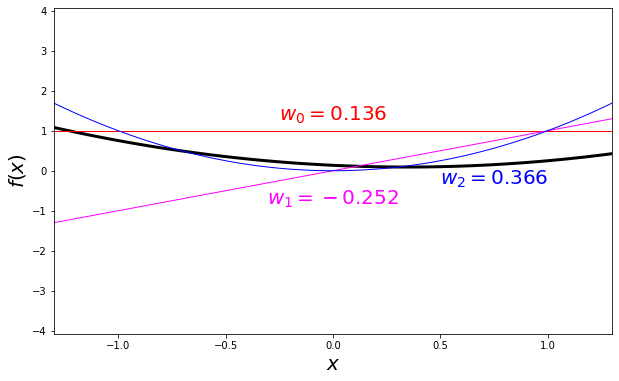

In [10]:
f, ax = plt.subplots(figsize=plot.big_wide_figsize)
loc =[[0, 1.4,],
      [0, -0.7],
      [0.75, -0.2]]
text =['$\phi(x) = 1$',
       '$\phi(x) = x$',
       '$\phi(x) = x^2$']

plot.basis(quadratic, x_min=-1.3, x_max=1.3, 
           fig=f, ax=ax, loc=loc, text=text,
           diagrams='./ml')


<img src="http://inverseprobability.com/talks/slides/../slides/diagrams/ml/quadratic_basis002.svg" class="" width="80%" style="vertical-align:middle;">

Figure: <i>The set of functions which are combined to form a *quadratic*
basis.</i>

In [11]:
import pods
from ipywidgets import IntSlider

In [12]:
pods.notebook.display_plots('quadratic_basis{num_basis:0>3}.svg', 
                            directory='./ml', 
                            num_basis=IntSlider(0,0,2,1))

interactive(children=(IntSlider(value=0, description='num_basis', max=2), Output()), _dom_classes=('widget-int…

This function takes in an $n\times 1$ dimensional vector and returns an
$n\times 3$ dimensional *design matrix* containing the basis functions.
We can plot those basis functions against there input as follows.

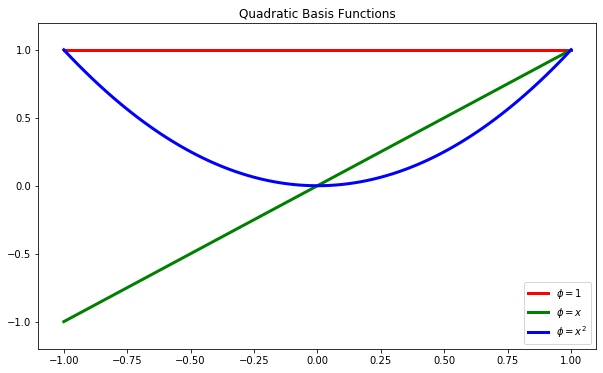

In [13]:
# first let's generate some inputs
n = 100
x = np.zeros((n, 1))  # create a data set of zeros
x[:, 0] = np.linspace(-1, 1, n) # fill it with values between -1 and 1

Phi = quadratic(x)

fig, ax = plt.subplots(figsize=plot.big_wide_figsize)
ax.set_ylim([-1.2, 1.2]) # set y limits to ensure basis functions show.
ax.plot(x[:,0], Phi[:, 0], 'r-', label = '$\phi=1$', linewidth=3)
ax.plot(x[:,0], Phi[:, 1], 'g-', label = '$\phi=x$', linewidth=3)
ax.plot(x[:,0], Phi[:, 2], 'b-', label = '$\phi=x^2$', linewidth=3)
ax.legend(loc='lower right')
_ = ax.set_title('Quadratic Basis Functions')

The actual function we observe is then made up of a sum of these
functions. This is the reason for the name basis. The term *basis* means
‘the underlying support or foundation for an idea, argument, or
process’, and in this context they form the underlying support for our
prediction function. Our prediction function can only be composed of a
weighted linear sum of our basis functions.

Quadratic Functions
-------------------

<img src="http://inverseprobability.com/talks/slides/../slides/diagrams/ml/quadratic_function002.svg" class="" width="80%" style="vertical-align:middle;">

Figure: <i>Functions constructed by weighted sum of the components of a
quadratic basis.</i>

In [14]:
import pods
from ipywidgets import IntSlider

In [15]:
pods.notebook.display_plots('quadratic_function{num_function:0>3}.svg', 
                            directory='./ml', 
                            num_function=IntSlider(0,0,2,1))

interactive(children=(IntSlider(value=0, description='num_function', max=2), Output()), _dom_classes=('widget-…

Different Bases
---------------

Our choice of basis can be made based on what our beliefs about what is
appropriate for the data. For example, the polynomial basis extends the
quadratic basis to aribrary degree, so we might define the $j$th basis
function associated with the model as $$
\phi_j(x_i) = x_i^j
$$ which is known as the *polynomial basis*.

Polynomial Basis
----------------

In [16]:
import matplotlib.pyplot as plt
import mlai
import teaching_plots as plot

In [ ]:
# %load -s polynomial mlai.py
def polynomial(x, num_basis=4, data_limits=[-1., 1.]):
    "Polynomial basis"
    centre = data_limits[0]/2. + data_limits[1]/2.
    span = data_limits[1] - data_limits[0]
    z = asarray(x, dtype=float) - centre
    z = 2*z/span
    Phi = zeros((x.shape[0], num_basis))
    for i in range(num_basis):
        Phi[:, i:i+1] = z**i
    return Phi


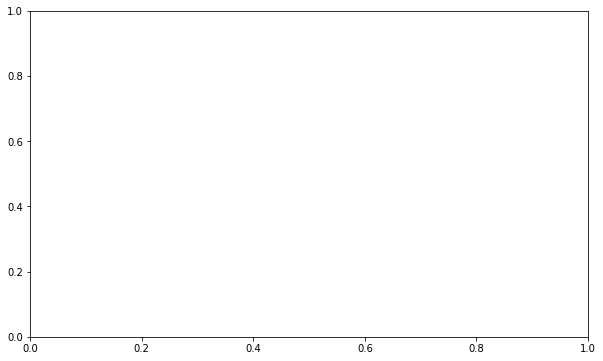

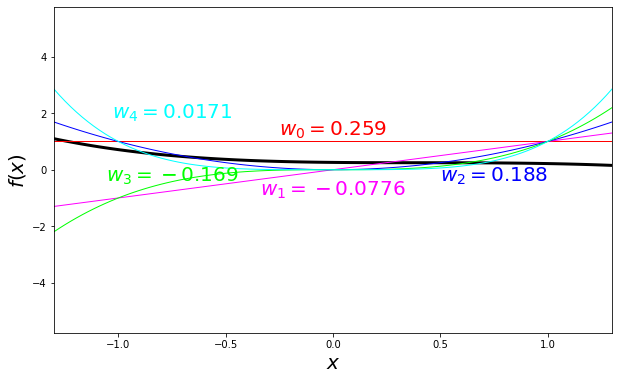

In [18]:
f, ax = plt.subplots(figsize=plot.big_wide_figsize)
f, ax = plt.subplots(figsize=plot.big_wide_figsize)
loc =[[0, 1.4,],
      [0, -0.7],
      [0.75, -0.2],
     [-0.75, -0.2],
     [-0.75, 2]]
text =['$\phi(x) = 1$',
       '$\phi(x) = x$',
       '$\phi(x) = x^2$',
       '$\phi(x) = x^3$',
       '$\phi(x) = x^4$']

plot.basis(mlai.polynomial, x_min=-1.3, x_max=1.3, 
           fig=f, ax=ax, loc=loc, text=text, num_basis=5,
           diagrams='./ml')

Functions Derived from Polynomial Basis
---------------------------------------

$$
f(x) = {\color{red}{w_0}} + {\color{magenta}{w_1 x}} + {\color{blue}{w_2 x^2}} + {\color{green}{w_3 x^3}} + {\color{cyan}{w_4 x^4}}
$$

<img src="http://inverseprobability.com/talks/slides/../slides/diagrams/ml/polynomial_basis004.svg" class="" width="80%" style="vertical-align:middle;">

Figure: <i>A polynomial basis is made up of different degrees of
polynomial.</i>

In [19]:
import pods
from ipywidgets import IntSlider

In [20]:
pods.notebook.display_plots('polynomial_basis{num_basis:0>3}.svg', 
                            directory='./ml', 
                            num_basis=IntSlider(0,0,4,1))

interactive(children=(IntSlider(value=0, description='num_basis', max=4), Output()), _dom_classes=('widget-int…

To aid in understanding how a basis works, we’ve provided you with a
small interactive tool for exploring this polynomial basis. The tool can
be summoned with the following command.

In [21]:
import pods

In [22]:
pods.notebook.display_prediction(basis=mlai.polynomial, num_basis=5)

interactive(children=(Checkbox(value=False, description='display_basis'), FloatSlider(value=0.0, description='…

Try moving the sliders around to change the weight of each basis
function. Click the control box `display_basis` to show the underlying
basis functions (in red). The prediction function is shown in a thick
blue line. *Warning* the sliders aren’t presented quite in the correct
order. `w_0` is associated with the bias, `w_1` is the linear term,
`w_2` the quadratic and here (because we have four basis functions) we
have `w_3` for the *cubic* term. So the subscript of the weight
parameter is always associated with the corresponding polynomial’s
degree.

### Exercise 1

Try increasing the number of basis functions (thereby increasing the
*degree* of the resulting polynomial). Describe what you see as you
increase number of basis up to 10. Is it easy to change the function in
intiutive ways?

### Exercise 1 Answer

Write your answer to Exercise 1 here

In [23]:
# Use this box for any code you need



Different Basis
---------------

The polynomial basis is widely used in Engineering and graphics, but it
has some drawbacks in machine learning: outside the input region between
-1 and 1, the values of the polynomial basis rise very quickly.

Now we look at basis functions that have been used as the *activation*
functions in neural network model.

Radial Basis Functions
----------------------

Another type of basis is sometimes known as a ‘radial basis’ because the
effect basis functions are constructed on ‘centres’ and the effect of
each basis function decreases as the radial distance from each centre
increases.

$$\phi_j(x) = \exp\left(-\frac{(x-\mu_j)^2}{\ell^2}\right)$$

In [24]:
import matplotlib.pyplot as plt
import mlai
import teaching_plots as plot

In [ ]:
# %load -s radial mlai.py
def radial(x, num_basis=4, data_limits=[-1., 1.], width=None):
    """Radial basis constructed using exponentiated quadratic form."""
    if num_basis>1:
        centres=linspace(data_limits[0], data_limits[1], num_basis)
        if width is None:
            width = (centres[1]-centres[0])/2.
    else:
        centres = asarray([data_limits[0]/2. + data_limits[1]/2.])
        if width is None:
            width = (data_limits[1]-data_limits[0])/2.
    
    Phi = zeros((x.shape[0], num_basis))
    for i in range(num_basis):
        Phi[:, i:i+1] = exp(-0.5*((asarray(x, dtype=float)-centres[i])/width)**2)
    return Phi


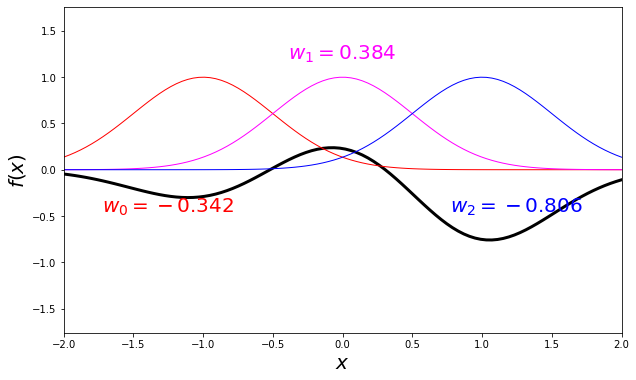

In [26]:
f, ax = plt.subplots(figsize=plot.big_wide_figsize)

loc = [[-1.25, -0.4],
       [0., 1.25],
       [1.25, -0.4]]
text = ['$\phi_1(x) = e^{-(x + 1)^2}$',
        '$\phi_2(x) = e^{-2x^2}$', 
        '$\phi_3(x) = e^{-2(x-1)^2}$']
plot.basis(mlai.radial, x_min=-2, x_max=2, 
           fig=f, ax=ax, loc=loc, text=text,
           diagrams='./ml')

In [27]:
pods.notebook.display_prediction(basis=mlai.radial, num_basis=4)

interactive(children=(Checkbox(value=False, description='display_basis'), FloatSlider(value=0.0, description='…

In [28]:
from ipywidgets import IntSlider
import pods

In [29]:
pods.notebook.display_plots('radial_basis{num_basis:0>3}.svg', 
                            directory='./ml', 
                            num_basis=IntSlider(0,0,2,1))

interactive(children=(IntSlider(value=0, description='num_basis', max=2), Output()), _dom_classes=('widget-int…

Functions Derived from Radial Basis
-----------------------------------

$$
f(x) = \color{red}{w_1 e^{-2(x+1)^2}}  + \color{magenta}{w_2e^{-2x^2}} + \color{blue}{w_3 e^{-2(x-1)^2}}
$$

<img src="http://inverseprobability.com/talks/slides/../slides/diagrams/ml/radial_basis002.svg" class="" width="80%" style="vertical-align:middle;">

Figure: <i>A radial basis is made up of different locally effective
functions centered at different points.</i>

In [30]:
from ipywidgets import IntSlider
import pods

In [31]:
pods.notebook.display_plots('radial_function{func_num:0>3}.svg', directory='./ml', func_num=IntSlider(0,0,2,1))

interactive(children=(IntSlider(value=0, description='func_num', max=2), Output()), _dom_classes=('widget-inte…

Rectified Linear Units
----------------------

In [32]:
import numpy as np

In [ ]:
# %load -s relu mlai.py
def relu(x, num_basis=4, data_limits=[-1., 1.], gain=None):
    """Rectified linear units basis"""
    if num_basis>2:
        centres=linspace(data_limits[0], data_limits[1], num_basis-1)
    elif num_basis==2:
        centres = asarray([data_limits[0]/2. + data_limits[1]/2.])
    else:
        centres = []
    if gain is None:
        gain = ones(num_basis-1)
    Phi = zeros((x.shape[0], num_basis))
    # Create the bias
    Phi[:, 0] = 1.0
    for i in range(1, num_basis):
        Phi[:, i:i+1] = (gain[i-1]*asarray(x, dtype=float)>centres[i-1])*(asarray(x, dtype=float)-centres[i-1])
    return Phi


In [34]:
import pods

In [35]:
pods.notebook.display_prediction(basis=mlai.relu, num_basis=4)

interactive(children=(Checkbox(value=False, description='display_basis'), FloatSlider(value=0.0, description='…

Rectified linear units are popular in the current generation of
multilayer perceptron models, or deep networks. These basis functions
start flat, and then become linear functions at a certain threshold.

In [36]:
import matplotlib.pyplot as plt
import teaching_plots as plot
import mlai

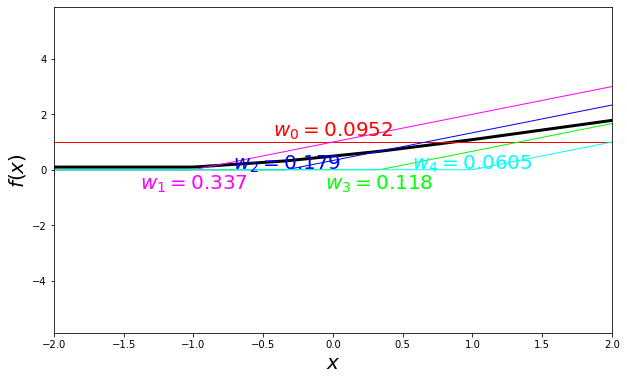

In [37]:
f, ax = plt.subplots(figsize=plot.big_wide_figsize)
loc =[[0, 1.4,],
      [-1, -0.5],
      [-0.33, 0.2],
      [0.33, -0.5],
      [1, 0.2]]
text =['$\phi(x) = 1$',
       '$\phi(x) = xH(x+1.0)$',
       '$\phi(x) = xH(x+0.33)$',
       '$\phi(x) = xH(x-0.33)$',
       '$\phi(x) = xH(x-1.0)$']
plot.basis(mlai.relu, x_min=-2.0, x_max=2.0, 
           fig=f, ax=ax, loc=loc, text=text,
           diagrams='./ml',
           num_basis=5)

Functions Derived from Relu Basis
---------------------------------

$$
f(x) = \color{red}{w_0}   + \color{magenta}{w_1 xH(x+1.0) } + \color{blue}{w_2 xH(x+0.33) } + \color{green}{w_3 xH(x-0.33)} +  \color{cyan}{w_4 xH(x-1.0)}
$$

<img src="http://inverseprobability.com/talks/slides/../slides/diagrams/ml/relu_basis004.svg" class="" width="80%" style="vertical-align:middle;">

Figure: <i>A rectified linear unit basis is made up of different
rectified linear unit functions centered at different points.</i>

In [38]:
import pods
from ipywidgets import IntSlider

In [39]:
pods.notebook.display_plots('relu_basis{num_basis:0>3}.svg', 
                            directory='./ml', 
                num_basis=IntSlider(0,0,4,1))

interactive(children=(IntSlider(value=0, description='num_basis', max=4), Output()), _dom_classes=('widget-int…

Hyperbolic Tangent Basis
------------------------

In [43]:
# %load -s tanh mlai.py
def tanh(x, num_basis=4, data_limits=[-1., 1.], gain=None):
    """Hyperbolic tangents"""
    if num_basis>2:
        centres=linspace(data_limits[0], data_limits[1], num_basis-1)
        width = (centres[1]-centres[0])/2.
    elif num_basis==2:
        centres = asarray([data_limits[0]/2. + data_limits[1]/2.])
        width = (data_limits[1]-data_limits[0])/2.
    else:
        centres = []
        width = None
    if gain is None and width is not None:
        gain = ones(num_basis-1)/width
    Phi = zeros((x.shape[0], num_basis))
    # Create the bias
    Phi[:, 0] = 1.0
    for i in range(1, num_basis):
        Phi[:, i:i+1] = tanh(gain[i-1]*(asarray(x, dtype=float)-centres[i-1]))
    return Phi


In [44]:
import pods

In [45]:
pods.notebook.display_prediction(basis=mlai.tanh, num_basis=4)

RecursionError: maximum recursion depth exceeded

Sigmoid or hyperbolic tangent basis was popular in the original
generation of multilayer perceptron models, or deep networks. These
basis functions start flat, rise and then saturate.

In [46]:
import matplotlib.pyplot as plt
import teaching_plots as plot
import mlai

RecursionError: maximum recursion depth exceeded

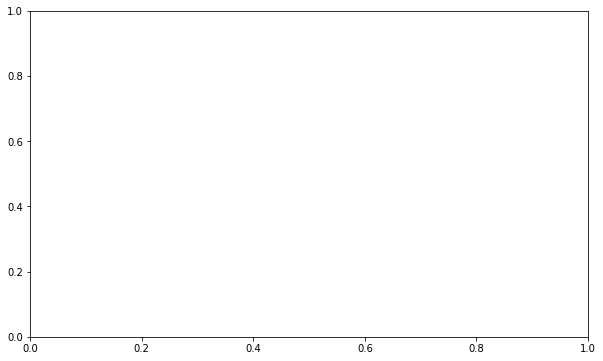

In [47]:
f, ax = plt.subplots(figsize=plot.big_wide_figsize)
loc =[[0, 1.4,],
      [-1, -0.7],
      [-0.33, 0],
      [0.33, -0.7],
      [1, 0]]
text =['$\phi(x) = 1$',
       '$\phi(x) = \\tanh(x+1.0)$',
       '$\phi(x) = \\tanh(x+0.33)$',
       '$\phi(x) = \\tanh(x-0.33)$',
       '$\phi(x) = \\tanh(x-1.0)$']
plot.basis(mlai.tanh, x_min=-2.0, x_max=2.0,
           fig=f, ax=ax, loc=loc, text=text,
           diagrams='./ml',
           num_basis=5)

Functions Derived from Tanh Basis
---------------------------------

$$
f(x) = {\color{red}{w_0}}   + {\color{magenta}{w_1 \text{tanh}\left(x+1\right)}}  + {\color{blue}{w_2 \text{tanh}\left(x+0.33\right)}}  + {\color{green}{w_3 \text{tanh}\left(x-0.33\right)}} + {\color{cyan}{w_4 \text{tanh}\left(x-1\right)}}
$$

<img src="http://inverseprobability.com/talks/slides/../slides/diagrams/ml/tanh_basis004.svg" class="" width="80%" style="vertical-align:middle;">

Figure: <i>A hyperbolic tangent basis is made up of s-shaped basis
functions centered at different points.</i>

In [48]:
import pods
from ipywidgets import IntSlider

In [49]:
pods.notebook.display_plots('tanh_basis{num_basis:0>3}.svg', 
                            directory='./ml', 
                            num_basis=IntSlider(0,0,4,1))

interactive(children=(IntSlider(value=0, description='num_basis', max=4), Output()), _dom_classes=('widget-int…

Fourier Basis
-------------

[Joseph Fourier](https://en.wikipedia.org/wiki/Joseph_Fourier) suggested
that functions could be converted to a sum of sines and cosines. A
Fourier basis is a linear weighted sum of these functions.
$$\phi_j(x) = w_0  + w_1 \sin(x) + w_2 \cos(x) + w_3 \sin(2x) + w_4 \cos(2x)$$

In [50]:
import numpy as np

In [ ]:
# %load -s fourier mlai.py
def fourier(x, num_basis=4, data_limits=[-1., 1.], frequency_range=None):
    """Fourier basis"""
    tau = 2*pi
    span = float(data_limits[1]-data_limits[0])
    Phi = ones((x.shape[0], num_basis))
    for i in range(1, num_basis):
        count = float((i+1)//2)
        if frequency_range is None:
            frequency = count/span
        else:
            frequency = frequency_range[i]
        if i % 2:
            Phi[:, i:i+1] = sin(tau*frequency*asarray(x, dtype=float))
        else:
            Phi[:, i:i+1] = cos(tau*frequency*asarray(x, dtype=float))
    return Phi


In [52]:
import matplotlib.pyplot as plt
import mlai
import teaching_plots as plot

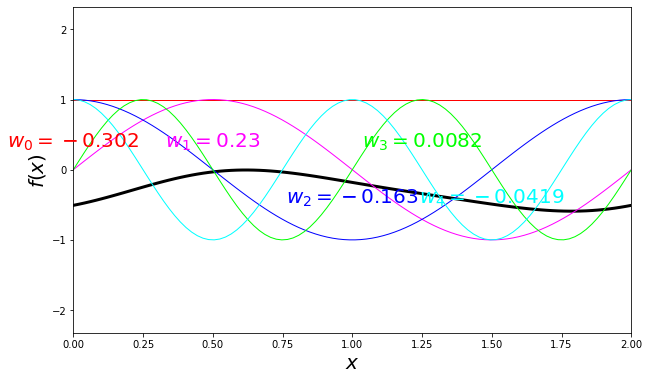

In [53]:
f, ax = plt.subplots(figsize=plot.big_wide_figsize)
loc =[[0., 0.4,],
      [0.5, 0.4],
      [1, -0.4],
      [1.25, 0.4],
      [1.5, -0.4]]
text =['$\phi(x) = 1$',
       '$\phi(x) = \sin(x)$',
       '$\phi(x) = \cos(x)$',
       '$\phi(x) = \sin(2x)$',
       '$\phi(x) = \cos(2x)$']
plot.basis(mlai.fourier, x_min=0, x_max=2, 
           fig=f, ax=ax, loc=loc, text=text,
           diagrams='./ml',
           num_basis=5)

In [54]:
import pods
from ipywidgets import IntSlider

In [55]:
pods.notebook.display_plots('fourier_basis{num_basis:0>3}.svg', 
                            directory='./ml', 
                            num_basis=IntSlider(0,0,4,1))

interactive(children=(IntSlider(value=0, description='num_basis', max=4), Output()), _dom_classes=('widget-int…

In this code, basis functions with an *odd* index are sine and basis
functions with an *even* index are cosine. The first basis function
(index 0, so cosine) has a frequency of 0 and then frequencies increase
every time a sine and cosine are included.

In [56]:
pods.notebook.display_prediction(basis=mlai.fourier, num_basis=5)

interactive(children=(Checkbox(value=False, description='display_basis'), FloatSlider(value=0.0, description='…

Functions Derived from Fourier Basis
------------------------------------

$$
f(x) = {\color{red}{w_0}}  + {\color{magenta}{w_1 \sin(x)}} + {\color{blue}{w_2 \cos(x)}} + {\color{green}{w_3 \sin(2x)}} + {\color{cyan}{w_4 \cos(2x)}}
$$

<img src="http://inverseprobability.com/talks/slides/../slides/diagrams/ml/fourier_basis004.svg" class="" width="80%" style="vertical-align:middle;">

Figure: <i>A Fourier basis is made up of sine and cosine functions with
different frequencies.</i>

In [57]:
import pods
from ipywidgets import IntSlider

In [58]:
pods.notebook.display_plots('fourier_function{func_num:0>3}.svg', directory='./ml', func_num=IntSlider(0,0,2,1))

interactive(children=(IntSlider(value=0, description='func_num', max=2), Output()), _dom_classes=('widget-inte…

Fitting to Data
---------------

Now we are going to consider how these basis functions can be adjusted
to fit to a particular data set. We will return to the olympic marathon
data from last time. First we will scale the output of the data to be
zero mean and variance 1.

Olympic Marathon Data
---------------------

<table>
<tr>
<td width="70%">

-   Gold medal times for Olympic Marathon since 1896.
-   Marathons before 1924 didn’t have a standardised distance.
-   Present results using pace per km.
-   In 1904 Marathon was badly organised leading to very slow times.

</td>
<td width="30%">

<img class="" src="http://inverseprobability.com/talks/slides/../slides/diagrams/Stephen_Kiprotich.jpg" style="width:100%">
<small>Image from Wikimedia Commons
<a href="http://bit.ly/16kMKHQ" class="uri">http://bit.ly/16kMKHQ</a></small>

</td>
</tr>
</table>

The first thing we will do is load a standard data set for regression
modelling. The data consists of the pace of Olympic Gold Medal Marathon
winners for the Olympics from 1896 to present. First we load in the data
and plot.

In [59]:
import numpy as np
import pods

In [60]:
data = pods.datasets.olympic_marathon_men()
x = data['X']
y = data['Y']

offset = y.mean()
scale = np.sqrt(y.var())

In [61]:
import matplotlib.pyplot as plt
import teaching_plots as plot
import mlai

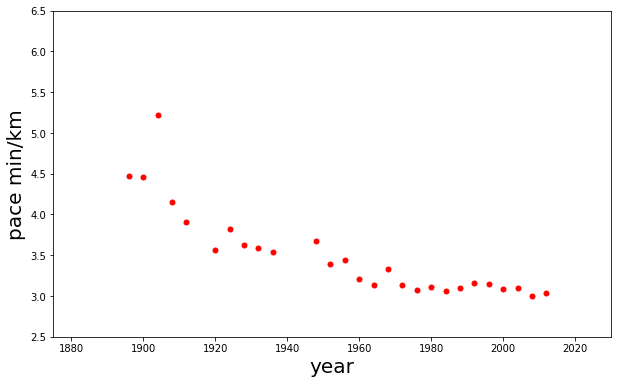

In [62]:
xlim = (1875,2030)
ylim = (2.5, 6.5)
yhat = (y-offset)/scale

fig, ax = plt.subplots(figsize=plot.big_wide_figsize)
_ = ax.plot(x, y, 'r.',markersize=10)
ax.set_xlabel('year', fontsize=20)
ax.set_ylabel('pace min/km', fontsize=20)
ax.set_xlim(xlim)
ax.set_ylim(ylim)

mlai.write_figure(figure=fig, 
                  filename='olympic-marathon.svg', 
                  diagrams='./datasets',
                  transparent=True, 
                  facecolor=(1, 1, 1, 1))

<img src="http://inverseprobability.com/talks/slides/../slides/diagrams/datasets/olympic-marathon.svg" class="" width="" style="vertical-align:middle;">

Figure: <i>Olympic marathon pace times since 1892.</i>

Things to notice about the data include the outlier in 1904, in this
year, the olympics was in St Louis, USA. Organizational problems and
challenges with dust kicked up by the cars following the race meant that
participants got lost, and only very few participants completed.

More recent years see more consistently quick marathons.

### Exercise 0

Now we are going to redefine our polynomial basis. Have a careful look
at the operations we perform on `x` to create `z`. We use `z` in the
polynomial computation. What are we doing to the inputs? Why do you
think we are changing `x` in this manner?

::: {.cell .markdown}

### Exercise 0 Answer

Write your answer to Exercise 0 here

In [63]:
import numpy as np

In [ ]:
# %load -s polynomial mlai.py
def polynomial(x, num_basis=4, data_limits=[-1., 1.]):
    "Polynomial basis"
    centre = data_limits[0]/2. + data_limits[1]/2.
    span = data_limits[1] - data_limits[0]
    z = asarray(x, dtype=float) - centre
    z = 2*z/span
    Phi = zeros((x.shape[0], num_basis))
    for i in range(num_basis):
        Phi[:, i:i+1] = z**i
    return Phi


In [65]:
import matplotlib.pyplot as plt

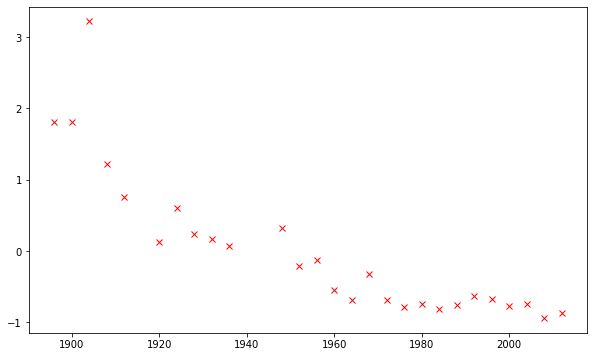

In [66]:
#x[:, 0] = np.linspace(1888, 2020, 1000)
fig, ax = plt.subplots(figsize=plot.big_wide_figsize)

ax.plot(x, yhat, 'rx')

In [67]:
import pods

In [68]:
pods.notebook.display_prediction(basis=dict(radial=mlai.radial, 
                                            polynomial=mlai.polynomial, 
                                            tanh=mlai.tanh, 
                                            fourier=mlai.fourier, 
                                            relu=mlai.relu), 
                                 data_limits=(1888, 2020),
                                 fig=fig, ax=ax,
                                 offset=0.,
                                 wlim = (-4., 4.),
                                 num_basis=4)

interactive(children=(Dropdown(description='basis', options={'radial': <function radial at 0x11e296a60>, 'poly…

### Exercise 2

Use the tool provided above to try and find the best fit you can to the
data. Explore the parameter space and give the weight values you used
for the

1.  polynomial basis
2.  Radial basis
3.  Fourier basis

Write your answers in the code box below creating a new vector of
parameters (in the correct order!) for each basis.

In [69]:
# Write your answer to Exercise 2 here



# (a) polynomial
###### Edit these lines #####
# w_0 =
# w_1 = 
# w_2 = 
# w_3 =
##############################
# w_polynomial = np.asarray([[w_0], [w_1], [w_2], [w_3]]) 

# (b) radial
###### Edit these lines #####
# w_0 =
# w_1 = 
# w_2 = 
# w_3 =
##############################
# w_rbf = np.asarray([[w_0], [w_1], [w_2], [w_3]]) 

# (c) fourier
###### Edit these lines #####
# w_0 =
# w_1 = 
# w_2 = 
# w_3 =
##############################
# w_fourier = np.asarray([[w_0], [w_1], [w_2], [w_3]])

In [70]:
np.asarray([[1, 2, 3, 4]]).shape

(1, 4)

Basis Function Models
---------------------

$$
  f(\mathbf{ x}_i) = \sum_{j=1}^mw_j \phi_{i, j}
  $$

$$
  f(\mathbf{ x}_i) = \mathbf{ w}^\top \boldsymbol{ \phi}_i
  $$

Log Likelihood for Basis Function Model
---------------------------------------

$$
  p\left(y_i|x_i\right)=\frac{1}{\sqrt{2\pi\sigma^2}}\exp\left(-\frac{\left(y_i-\mathbf{ w}^{\top}\boldsymbol{ \phi}_i\right)^{2}}{2\sigma^2}\right).
  $$

$$
  L(\mathbf{ w},\sigma^2)= -\frac{n}{2}\log \sigma^2-\frac{n}{2}\log 2\pi -\frac{\sum_{i=1}^{n}\left(y_i-\mathbf{ w}^{\top}\boldsymbol{ \phi}_i\right)^{2}}{2\sigma^2}.
  $$

Objective Function
------------------

$$
  E(\mathbf{ w},\sigma^2)= \frac{n}{2}\log\sigma^2 + \frac{\sum_{i=1}^{n}\left(y_i-\mathbf{ w}^{\top}\boldsymbol{ \phi}_i\right)^{2}}{2\sigma^2}.
  $$

Expand the Brackets
-------------------

$$
\begin{align}
  E(\mathbf{ w},\sigma^2) = &\frac{n}{2}\log \sigma^2 + \frac{1}{2\sigma^2}\sum_{i=1}^{n}y_i^{2}-\frac{1}{\sigma^2}\sum_{i=1}^{n}y_i\mathbf{ w}^{\top}\boldsymbol{ \phi}_i\\ &+\frac{1}{2\sigma^2}\sum_{i=1}^{n}\mathbf{ w}^{\top}\boldsymbol{ \phi}_i\boldsymbol{ \phi}_i^{\top}\mathbf{ w}+\text{const}.
\end{align}
$$

Expand the Brackets
-------------------

$$\begin{align} E(\mathbf{ w}, \sigma^2) = & \frac{n}{2}\log \sigma^2 + \frac{1}{2\sigma^2}\sum_{i=1}^{n}y_i^{2}-\frac{1}{\sigma^2} \mathbf{ w}^\top\sum_{i=1}^{n}\boldsymbol{ \phi}_i y_i\\ & +\frac{1}{2\sigma^2}\mathbf{ w}^{\top}\left[\sum_{i=1}^{n}\boldsymbol{ \phi}_i\boldsymbol{ \phi}_i^{\top}\right]\mathbf{ w}+\text{const}.\end{align}$$

Design Matrices
---------------

We like to make use of *design* matrices for our data. Design matrices,
as you will recall, involve placing the data points into rows of the
matrix and data features into the columns of the matrix. By convention,
we are referincing a vector with a bold lower case letter, and a matrix
with a bold upper case letter. The design matrix is therefore given by
$$
  \boldsymbol{ \Phi}= \begin{bmatrix} \mathbf{1} & \mathbf{ x}& \mathbf{ x}^2\end{bmatrix}
  $$ so that $$
  \boldsymbol{ \Phi}\in \Re^{n\times p}.
  $$

Multivariate Derivatives Reminder
---------------------------------

$$\frac{\text{d}\mathbf{a}^{\top}\mathbf{ w}}{\text{d}\mathbf{ w}}=\mathbf{a}$$
and
$$\frac{\text{d}\mathbf{ w}^{\top}\mathbf{A}\mathbf{ w}}{\text{d}\mathbf{ w}}=\left(\mathbf{A}+\mathbf{A}^{\top}\right)\mathbf{ w}$$
or if $\mathbf{A}$ is symmetric (*i.e.* $\mathbf{A}=\mathbf{A}^{\top}$)
$$\frac{\text{d}\mathbf{ w}^{\top}\mathbf{A}\mathbf{ w}}{\text{d}\mathbf{ w}}=2\mathbf{A}\mathbf{ w}.$$

Differentiate
-------------

Differentiating with respect to the vector $\mathbf{ w}$ we obtain
$$\frac{\text{d} E\left(\mathbf{ w},\sigma^2 \right)}{\text{d}\mathbf{ w}}=-\frac{1}{\sigma^2} \sum_{i=1}^{n}\boldsymbol{ \phi}_iy_i+\frac{1}{\sigma^2} \left[\sum_{i=1}^{n}\boldsymbol{ \phi}_i\boldsymbol{ \phi}_i^{\top}\right]\mathbf{ w}$$
Leading to
$$\mathbf{ w}^{*}=\left[\sum_{i=1}^{n}\boldsymbol{ \phi}_i\boldsymbol{ \phi}_i^{\top}\right]^{-1}\sum_{i=1}^{n}\boldsymbol{ \phi}_iy_i,$$

Matrix Notation
---------------

Rewrite in matrix notation: $$
\sum_{i=1}^{n}\boldsymbol{ \phi}_i\boldsymbol{ \phi}_i^\top = \boldsymbol{ \Phi}^\top \boldsymbol{ \Phi}$$
$$\sum _{i=1}^{n}\boldsymbol{ \phi}_iy_i = \boldsymbol{ \Phi}^\top \mathbf{ y}
$$

Update Equations
----------------

$$
  \mathbf{ w}^{*} = \left(\boldsymbol{ \Phi}^\top \boldsymbol{ \Phi}\right)^{-1} \boldsymbol{ \Phi}^\top \mathbf{ y}
  $$

$$
  \left.\sigma^2\right.^{{*}}=\frac{\sum_{i=1}^{n}\left(y_i-\left.\mathbf{ w}^{*}\right.^{\top}\boldsymbol{ \phi}_i\right)^{2}}{n}.
  $$

$$
  \left(\boldsymbol{ \Phi}^\top \boldsymbol{ \Phi}\right)\mathbf{ w}= \boldsymbol{ \Phi}^\top \mathbf{ y}
  $$

Polynomial Fits to Olympic Data
-------------------------------

In [71]:
import numpy as np
from matplotlib import pyplot as plt
import mlai
import pods

In [72]:
basis = mlai.polynomial

data = pods.datasets.olympic_marathon_men()

x = data['X']
y = data['Y']

xlim = [1892, 2020]

basis=mlai.Basis(mlai.polynomial, number=1, data_limits=xlim)

In [73]:
import teaching_plots as plot

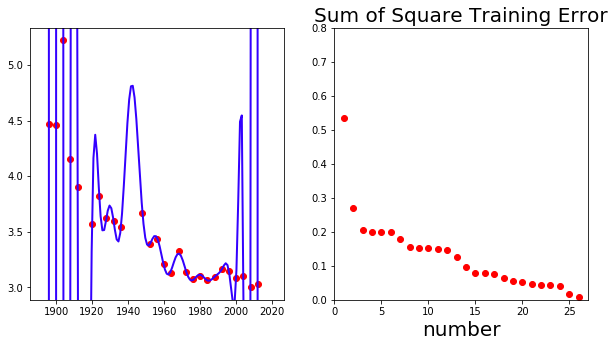

In [74]:
plot.rmse_fit(x, y, param_name='number', param_range=(1, 27), 
              model=mlai.LM, 
              basis=basis,
              xlim=xlim, objective_ylim=[0, 0.8],
              diagrams='./ml')

In [75]:
from ipywidgets import IntSlider

In [76]:
pods.notebook.display_plots('olympic_LM_polynomial_number{num_basis:0>3}.svg',
                            directory='./ml', 
                            num_basis=IntSlider(1,1,27,1))

interactive(children=(IntSlider(value=1, description='num_basis', max=27, min=1), Output()), _dom_classes=('wi…

In [77]:
import numpy as np
from matplotlib import pyplot as plt
import teaching_plots as plot
import mlai
import pods

In [78]:
basis = mlai.polynomial

data = pods.datasets.olympic_marathon_men()

x = data['X']
y = data['Y']

xlim = [1892, 2020]
max_basis = 27

ll = np.array([np.nan]*(max_basis))
sum_squares = np.array([np.nan]*(max_basis))
basis=mlai.Basis(mlai.polynomial, number=1, data_limits=xlim)

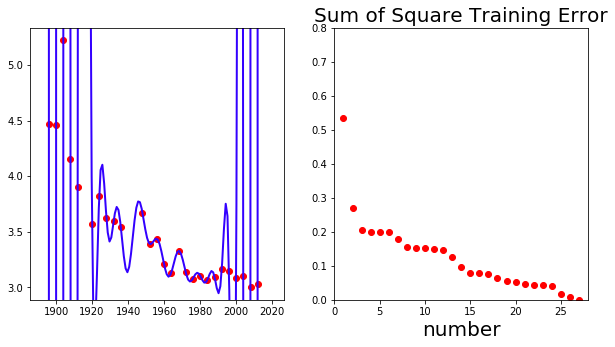

In [79]:
plot.rmse_fit(x, y, param_name='number', param_range=(1, 28), 
              model=mlai.LM, basis=basis, 
              xlim=xlim, objective_ylim=[0, 0.8],
              diagrams='./ml')

In [80]:
pods.notebook.display_plots('olympic_LM_polynomial_number{num_basis:0>3}.svg',
                            directory='./ml', 
                            num_basis=IntSlider(1,1,28,1))

interactive(children=(IntSlider(value=1, description='num_basis', max=28, min=1), Output()), _dom_classes=('wi…

<img src="http://inverseprobability.com/talks/slides/../slides/diagrams/ml/olympic_LM_polynomial_number002.svg" class="" width="80%" style="vertical-align:middle;">

Figure: <i>Fit of a 1 degree polynomial to the olympic marathon
data.</i>

<img src="http://inverseprobability.com/talks/slides/../slides/diagrams/ml/olympic_LM_polynomial_number003.svg" class="" width="80%" style="vertical-align:middle;">

Figure: <i>Fit of a 2 degree polynomial to the olympic marathon
data.</i>

::: {.cell .markdown}

Non-linear but Linear in the Parameters
---------------------------------------

One rather nice aspect of our model is that whilst it is non-linear in
the inputs, it is still linear in the parameters $\mathbf{ w}$. This
means that our derivations from before continue to operate to allow us
to work with this model. In fact, although this is a non-linear
regression it is still known as a *linear model* because it is linear in
the parameters,

$$
f(\mathbf{ x}) = \mathbf{ w}^\top \boldsymbol{ \phi}(\mathbf{ x})
$$ where the vector $\mathbf{ x}$ appears inside the basis functions,
making our result, $f(\mathbf{ x})$ non-linear in the inputs, but
$\mathbf{ w}$ appears outside our basis function, making our result
*linear* in the parameters. In practice, our basis function itself may
contain its own set of parameters, $$
f(\mathbf{ x}) = \mathbf{ w}^\top \boldsymbol{ \phi}(\mathbf{ x};
\boldsymbol{\theta}),
$$ that we’ve denoted here as $\boldsymbol{\theta}$. If these parameters
appear inside the basis function then our model is *non-linear* in these
parameters.

### Exercise 0

For the following prediction functions state whether the model is linear
in the inputs, the parameters or both.

1.  $f(x) = w_1x_1 + w_2$

2.  $f(x) = w_1\exp(x_1) + w_2x_2 + w_3$

3.  $f(x) = \log(x_1^{w_1}) + w_2x_2^2 + w_3$

4.  $f(x) = \exp(-\sum_i(x_i - w_i)^2)$

5.  $f(x) = \exp(-\mathbf{ w}^\top \mathbf{ x})$

### Exercise 0 Answer

Write your answer to Exercise 0 here

Fitting the Model Yourself
--------------------------

You now have everything you need to fit a non- linear (in the inputs)
basis function model to the marathon data.

### Exercise 3

Choose one of the basis functions you have explored above. Compute the
design matrix on the covariates (or input data), `x`. Use the design
matrix and the response variable `y` to solve the following linear
system for the model parameters `w`. $$
\boldsymbol{ \phi}^\top\boldsymbol{ \phi}\mathbf{ w}= \boldsymbol{ \phi}^\top \mathbf{ y}
$$ Compute the corresponding error on the training data. How does it
compare to the error you were able to achieve fitting the basis above?
Plot the form of your prediction function from the least squares
estimate alongside the form of you prediction function you fitted by
hand.

In [81]:
# Write your answer to Exercise 3 here




Further Reading
---------------

-   Section 1.4 of Rogers and Girolami (2011)

-   Chapter 1, pg 1-6 of Bishop (2006)

-   Chapter 3, Section 3.1 up to pg 143 of Bishop (2006)

Lecture on Basis Functions from GPRS Uganda
-------------------------------------------

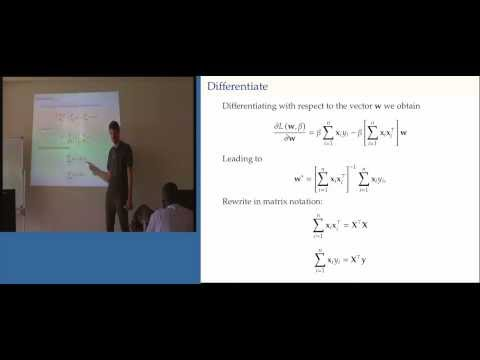

In [82]:
from IPython.lib.display import YouTubeVideo
YouTubeVideo('PoNbOnUnOao')

Figure: <i>Lecture on Basis functions from GPRS in Uganda in 2013.</i>

Use of QR Decomposition for Numerical Stability
-----------------------------------------------

In the last session we showed how rather than computing
$\mathbf{X}^\top\mathbf{X}$ as an intermediate step to our solution, we
could compute the solution to the regressiond directly through
[QR-decomposition](http://en.wikipedia.org/wiki/QR_decomposition). Now
we will consider an example with non linear basis functions where such
computation is critical for forming the right answer.

*TODO* example with polynomials.

In [83]:
import numpy as np

In [84]:
x = np.random.normal(size=(10, 1))

In [86]:
Phi = mlai.fourier(x, 5)

In [87]:
(np.dot(Phi.T,Phi))

array([[10.        , -1.5665933 ,  2.01037053,  0.57887802, -3.21526025],
       [-1.5665933 ,  6.60763013,  0.28943901,  0.44029142,  1.1677348 ],
       [ 2.01037053,  0.28943901,  3.39236987, -0.3988585 ,  1.57007911],
       [ 0.57887802,  0.44029142, -0.3988585 ,  4.64756402,  1.12649047],
       [-3.21526025,  1.1677348 ,  1.57007911,  1.12649047,  5.35243598]])

In [88]:
Phi*Phi

array([[1.00000000e+00, 7.81134372e-01, 2.18865628e-01, 6.83853860e-01,
        3.16146140e-01],
       [1.00000000e+00, 8.81109096e-02, 9.11889090e-01, 3.21389509e-01,
        6.78610491e-01],
       [1.00000000e+00, 7.72392871e-01, 2.27607129e-01, 7.03208495e-01,
        2.96791505e-01],
       [1.00000000e+00, 9.41009801e-01, 5.89901993e-02, 2.22041423e-01,
        7.77958577e-01],
       [1.00000000e+00, 9.35745357e-01, 6.42546430e-02, 2.40503935e-01,
        7.59496065e-01],
       [1.00000000e+00, 9.09333303e-03, 9.90906667e-01, 3.60425773e-02,
        9.63957423e-01],
       [1.00000000e+00, 6.43805150e-01, 3.56194850e-01, 9.17280315e-01,
        8.27196849e-02],
       [1.00000000e+00, 9.99996896e-01, 3.10387609e-06, 1.24154658e-05,
        9.99987585e-01],
       [1.00000000e+00, 6.08637156e-01, 3.91362844e-01, 9.52791873e-01,
        4.72081271e-02],
       [1.00000000e+00, 8.27704281e-01, 1.72295719e-01, 5.70439617e-01,
        4.29560383e-01]])

Thanks!
-------

For more information on these subjects and more you might want to check
the following resources.

-   twitter: [@lawrennd](https://twitter.com/lawrennd)
-   podcast: [The Talking Machines](http://thetalkingmachines.com)
-   newspaper: [Guardian Profile
    Page](http://www.theguardian.com/profile/neil-lawrence)
-   blog:
    [http://inverseprobability.com](http://inverseprobability.com/blog.html)

References
----------

Bishop, C.M., 2006. Pattern recognition and machine learning. springer.

Rogers, S., Girolami, M., 2011. A first course in machine learning. CRC
Press.